# **Mask Detection using customized model**

#*Creating access to import Dataset from Kaggle to Google Colab*

In [1]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#**Downloading the Dataset**

In [2]:

!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

!kaggle datasets download -d andrewmvd/face-mask-detection
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 97% 321M/330M [00:03<00:00, 49.7MB/s]
100% 330M/330M [00:03<00:00, 94.1MB/s]
 97% 384M/398M [00:03<00:00, 152MB/s]
100% 398M/398M [00:03<00:00, 122MB/s]
 97% 201M/207M [00:01<00:00, 117MB/s]
100% 207M/207M [00:01<00:00, 120MB/s]


**Extracting the ZIP File data format**


In [5]:
from zipfile import ZipFile
file_name1='/content/face-mask-12k-images-dataset.zip'
file_name2='/content/face-mask-detection.zip'
file_name3='/content/covid-face-mask-detection-dataset.zip'
for file in [file_name1, file_name2, file_name3]:
    with ZipFile(file,'r') as zip:
      zip.extractall()

In [6]:
#!mv  -v content/New_Masks_Dataset/Train/Non_Mask/* content/Face_Mask_Dataset/Train/WithoutMask/
!mv  -v New_Masks_Dataset/Train/Non_Mask/* Face_Mask_Dataset/Train/WithoutMask/
!mv  -v New_Masks_Dataset/Test/Non_Mask/* Face_Mask_Dataset/Test/WithoutMask/
!mv  -v New_Masks_Dataset/Validation/Non_Mask/* Face_Mask_Dataset/Validation/WithoutMask/


renamed 'New_Masks_Dataset/Train/Non_Mask/0.jpg' -> 'Face_Mask_Dataset/Train/WithoutMask/0.jpg'
renamed 'New_Masks_Dataset/Train/Non_Mask/100.jpg' -> 'Face_Mask_Dataset/Train/WithoutMask/100.jpg'
renamed 'New_Masks_Dataset/Train/Non_Mask/101.jpg' -> 'Face_Mask_Dataset/Train/WithoutMask/101.jpg'
renamed 'New_Masks_Dataset/Train/Non_Mask/102.jpg' -> 'Face_Mask_Dataset/Train/WithoutMask/102.jpg'
renamed 'New_Masks_Dataset/Train/Non_Mask/104.jpg' -> 'Face_Mask_Dataset/Train/WithoutMask/104.jpg'
renamed 'New_Masks_Dataset/Train/Non_Mask/105.jpg' -> 'Face_Mask_Dataset/Train/WithoutMask/105.jpg'
renamed 'New_Masks_Dataset/Train/Non_Mask/106.jpg' -> 'Face_Mask_Dataset/Train/WithoutMask/106.jpg'
renamed 'New_Masks_Dataset/Train/Non_Mask/107.jpg' -> 'Face_Mask_Dataset/Train/WithoutMask/107.jpg'
renamed 'New_Masks_Dataset/Train/Non_Mask/108.jpg' -> 'Face_Mask_Dataset/Train/WithoutMask/108.jpg'
renamed 'New_Masks_Dataset/Train/Non_Mask/109.jpg' -> 'Face_Mask_Dataset/Train/WithoutMask/109.jpg'
rena

**Importing the liberaries and framework(tensorflow)**




In [7]:
import keras 
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import pandas as pd
import os
from skimage.transform import resize
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import cv2 
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout,GlobalAveragePooling2D, Activation, Flatten, Conv2D, MaxPooling2D, MaxPool2D, BatchNormalization
from keras import models, layers, optimizers
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint,Callback, EarlyStopping, ReduceLROnPlateau
from keras import backend as K
import tensorflow as tf
random.seed(180)

**Pathing the data**

In [8]:
traindir='/content/Face_Mask_Dataset/Train'
validdir='/content/Face_Mask_Dataset/Validation'
testdir='/content/Face_Mask_Dataset/Test'



**Creating Function to load the data**

In [9]:
def load_data(image_list,label_list,path):
    classes=['WithMask','WithoutMask']
    for category in classes:
        picList= os.listdir(path+"/"+str(category))
        for pic in tqdm(picList):
            image= cv2.imread(path+"/"+str(category)+"/"+pic)
            image= cv2.resize(image,(128,128))
            image = img_to_array(image)/255.0
            image_list.append(image)
            label_list.append(classes.index(category))
    return image_list,label_list

**Using the function to get images and labels for the dataset(Train, Test, Validation)**

In [10]:
train_images=[]
train_labels=[]
train_images,train_labels= load_data(train_images,train_labels,traindir)

100%|██████████| 5300/5300 [00:04<00:00, 1315.04it/s]


In [11]:
val_images=[]
val_labels=[]
val_images,val_labels= load_data(val_images,val_labels,validdir)

100%|██████████| 553/553 [00:01<00:00, 299.81it/s]


In [12]:
test_images=[]
test_labels=[]
test_images,test_labels= load_data(test_images,test_labels,testdir)

100%|██████████| 559/559 [00:00<00:00, 652.04it/s]


**Defining a function which converting list to array**

In [13]:
def convert_to_array(train_images,train_labels):
    images = np.array(train_images)
    labels = np.array(train_labels)
    return images,labels

In [14]:
x_train,y_train= convert_to_array(train_images,train_labels)
x_val,y_val= convert_to_array(val_images,val_labels)
x_test,y_test= convert_to_array(test_images,test_labels)

**Deleting the unnecessary data to save memory**

In [15]:
del train_images
del train_labels
del val_images
del val_labels
del test_images
del test_labels

**Showing the shape for the dataset**

In [16]:
print(x_train.shape, y_train.shape, type(x_train), x_train.dtype,y_train.dtype)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(10300, 128, 128, 3) (10300,) <class 'numpy.ndarray'> float32 int64
(953, 128, 128, 3) (953,)
(1042, 128, 128, 3) (1042,)


#**Converting the data to categorical format(One Hot Encoding) and showing the results**

**Before the converting**

In [17]:
print(y_train[650])
print(y_val[650])
print(y_test[650])

0
1
1


In [18]:
y_train= to_categorical(y_train)
y_val= to_categorical(y_val)
y_test= to_categorical(y_test)

**After the converting**

In [19]:
print(y_train[650])
print(y_val[650])
print(y_test[650])

[1. 0.]
[0. 1.]
[0. 1.]


**lets augment our images in real-time while our model is still training like (Rotations - Random Shifts - Flips - Brightness)**

In [20]:
augmentation = ImageDataGenerator(  
    height_shift_range= 0.2, 
    width_shift_range=0.2, 
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

**Checkpoint and Callback to choose the best Val_loss**

In [21]:
file_path="./model_weight.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor="val_loss", mode='auto', patience=10,restore_best_weights=True)
callbacks_list = [checkpoint,early]

**Modeling**

In [22]:
model5=Sequential()
model5.add(Conv2D(32,(3,3),activation='relu', input_shape=(128, 128, 3),padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(32,(3,3),activation='relu', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.2))


model5.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.2))


model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(2,activation='softmax'))
model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        1

**Setting values to each variables and compiling**

In [23]:
INIT_LR, EPOCHS, BS=0.0001, 100, 32
model5.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001,decay= INIT_LR/EPOCHS),metrics=['accuracy'])

**Shuffling**

In [24]:
from sklearn.utils import shuffle
x_val,y_val= shuffle(x_val,y_val)

**Fitting the model**

In [25]:
history = model5.fit(
    augmentation.flow(x_train,y_train,batch_size=BS,shuffle=True),
    steps_per_epoch= len(x_train)//BS,
    validation_data=(x_val,y_val),
    validation_steps= len(x_val)//BS,
    epochs= EPOCHS,
    callbacks=[callbacks_list],
    verbose=1
)

Epoch 1/100
321/321 [==============================] - 78s 140ms/step - loss: 0.2184 - accuracy: 0.9195 - val_loss: 0.7076 - val_accuracy: 0.7891

Epoch 00001: val_loss improved from inf to 0.70764, saving model to ./model_weight.hdf5
Epoch 2/100
321/321 [==============================] - 42s 132ms/step - loss: 0.1629 - accuracy: 0.9413 - val_loss: 0.1251 - val_accuracy: 0.9601

Epoch 00002: val_loss improved from 0.70764 to 0.12511, saving model to ./model_weight.hdf5
Epoch 3/100
321/321 [==============================] - 42s 132ms/step - loss: 0.1377 - accuracy: 0.9508 - val_loss: 0.1238 - val_accuracy: 0.9517

Epoch 00003: val_loss improved from 0.12511 to 0.12383, saving model to ./model_weight.hdf5
Epoch 4/100
321/321 [==============================] - 42s 131ms/step - loss: 0.1129 - accuracy: 0.9598 - val_loss: 0.1353 - val_accuracy: 0.9559

Epoch 00004: val_loss did not improve from 0.12383
Epoch 5/100
321/321 [==============================] - 42s 130ms/step - loss: 0.1017 - ac

**Visualizing loss and accuracy for the epochs**

In [26]:
def plot_learning_curve(history):
    plt.figure(figsize=(18,9))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim(0, 1)
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim(0, 1)
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('./loss_curve.png')

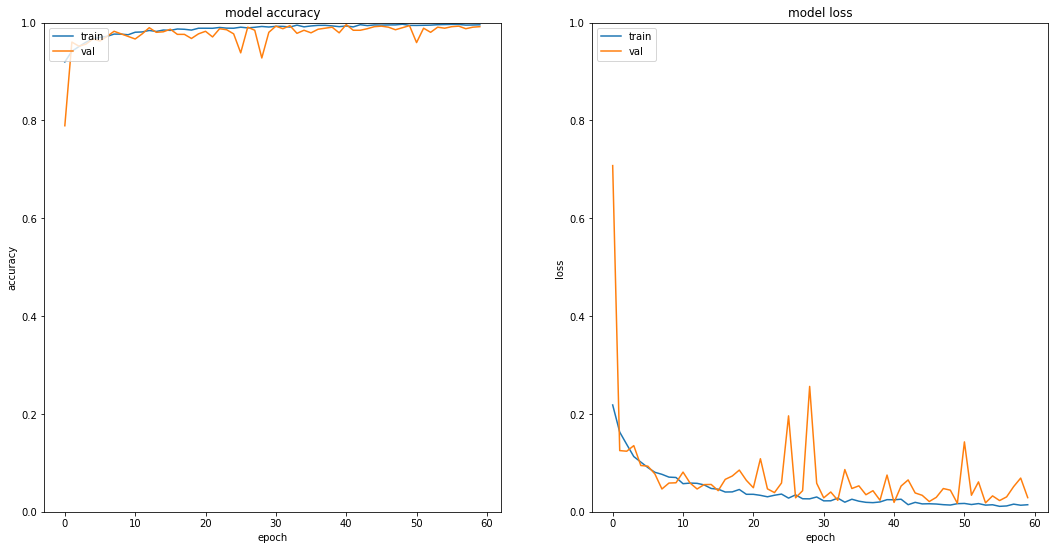

In [27]:
plot_learning_curve(history)
plt.show()

In [28]:
model5.load_weights("./model_weight.hdf5")
score=model5.evaluate(x_test,y_test)
print("Loss: {} \t\tAccuracy: {}".format(score[0],score[1]))

33/33 [==============================] - 1s 28ms/step - loss: 0.0209 - accuracy: 0.9933
Loss: 0.020885441452264786 		Accuracy: 0.9932821393013


**Predicting**

In [29]:
y_pred = model5.predict(x_test,batch_size=BS)
Y_pred = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

**Classification report**

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred,target_names=['WithMask','WithoutMask']))

              precision    recall  f1-score   support

    WithMask       0.99      1.00      0.99       483
 WithoutMask       1.00      0.99      0.99       559

    accuracy                           0.99      1042
   macro avg       0.99      0.99      0.99      1042
weighted avg       0.99      0.99      0.99      1042



**Visualizing the results by using confusion matrix**

In [31]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('./confusion_matrix.png')

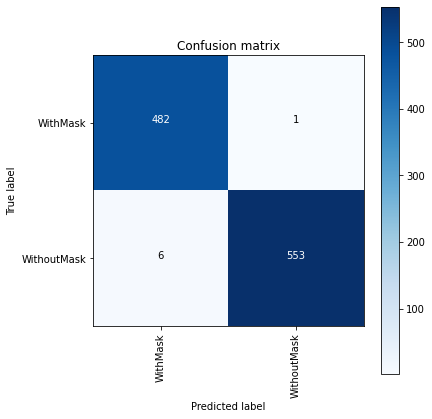

In [32]:
# confusion matrix
cm = confusion_matrix(Y_true, Y_pred)        
# plot confusin matrix
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['WithMask','WithoutMask'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

**Saving the model to reuse it later.**

In [33]:
model5.save('/content/mymodel.h5', save_format='h5')


In [34]:
tal3ot = keras.models.load_model('/content/mymodel.h5')


In [36]:
model5.predict(x_test)

array([[1.0000000e+00, 2.0944417e-10],
       [1.0000000e+00, 2.7952426e-13],
       [9.9999845e-01, 1.5286723e-06],
       ...,
       [1.7750261e-05, 9.9998224e-01],
       [3.4349904e-12, 1.0000000e+00],
       [1.3342213e-10, 1.0000000e+00]], dtype=float32)

In [44]:
mmm = cv2.imread('/content/1.png')

mmm = cv2.resize(mmm,(128,128))
mmm = img_to_array(mmm)/255.0
mmm,_ = convert_to_array([mmm], [1])

In [45]:
model5.predict(mmm)

array([[4.227282e-06, 9.999958e-01]], dtype=float32)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = 245
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('./confusion_matrix.png')

In [5]:
cm = np.array([[243, 240], [243, 260]])

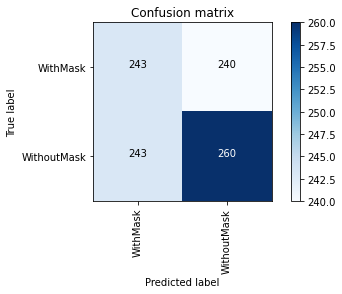

In [6]:
plot_confusion_matrix(cm, ['WithMask','WithoutMask'])